C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\602667301.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

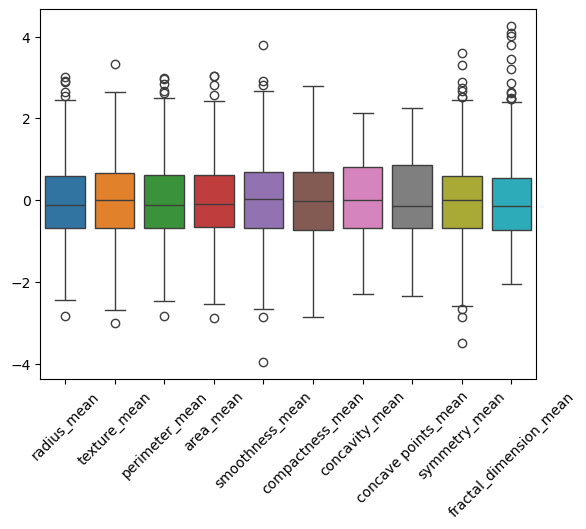

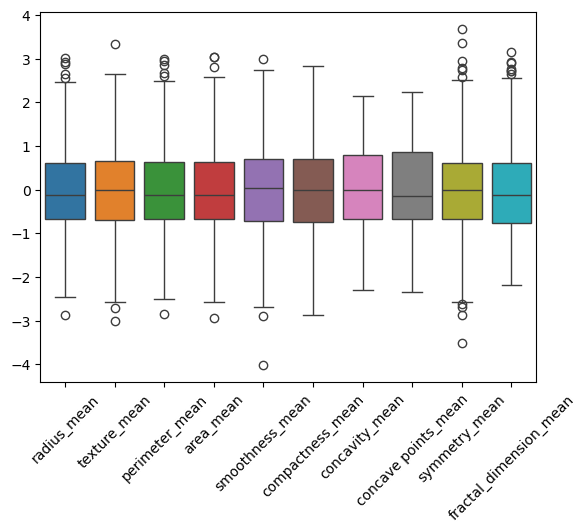

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler #not currently used
from scipy.stats import zscore #not needed but built in
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

print(df.head())

#imports/load data
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df.head()

#1. Print distinct diagnosis values and frequency in dataset
print(df['diagnosis'].value_counts())

#2. Test if the number of unique IDs is equal to sample size, i.e. no repeated patients
ids = print(df.id.nunique() == df.id.count())
print(ids)
#3. At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min(df.diagnosis.value_counts()/10)
print(max_features)

#4. Uncomment the code to see which features have extreme outliers:
sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()
plt.close()

#5. Uncomment the code to remove the samples with extreme fractal_dimensions_mean values:
q_hi  = df["fractal_dimension_mean"].quantile(0.99)
df_filtered = df[(df["fractal_dimension_mean"] < q_hi)]

#6. Run the boxplot again but with the filtered dataframe:

sns.boxplot(data=np.log(df_filtered[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45)
plt.show()
plt.close()


C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\2020089158.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


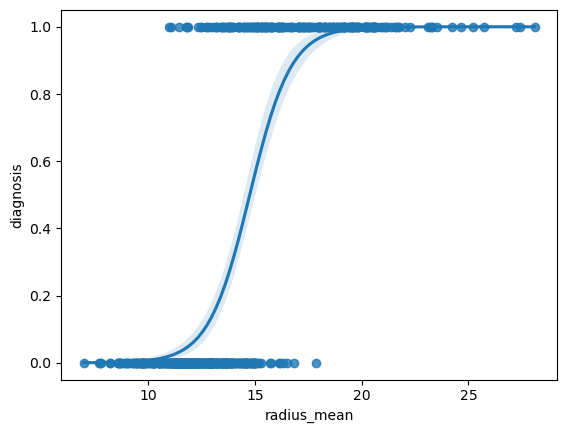

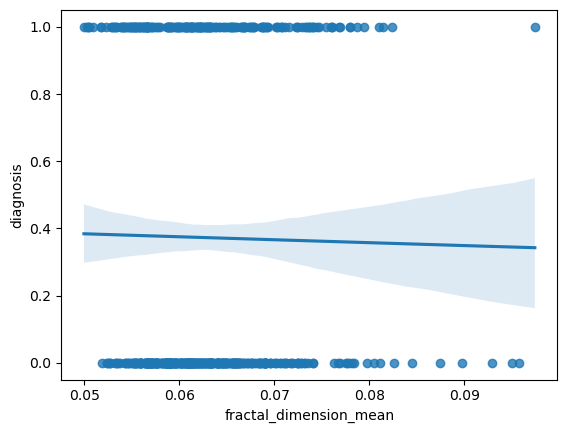

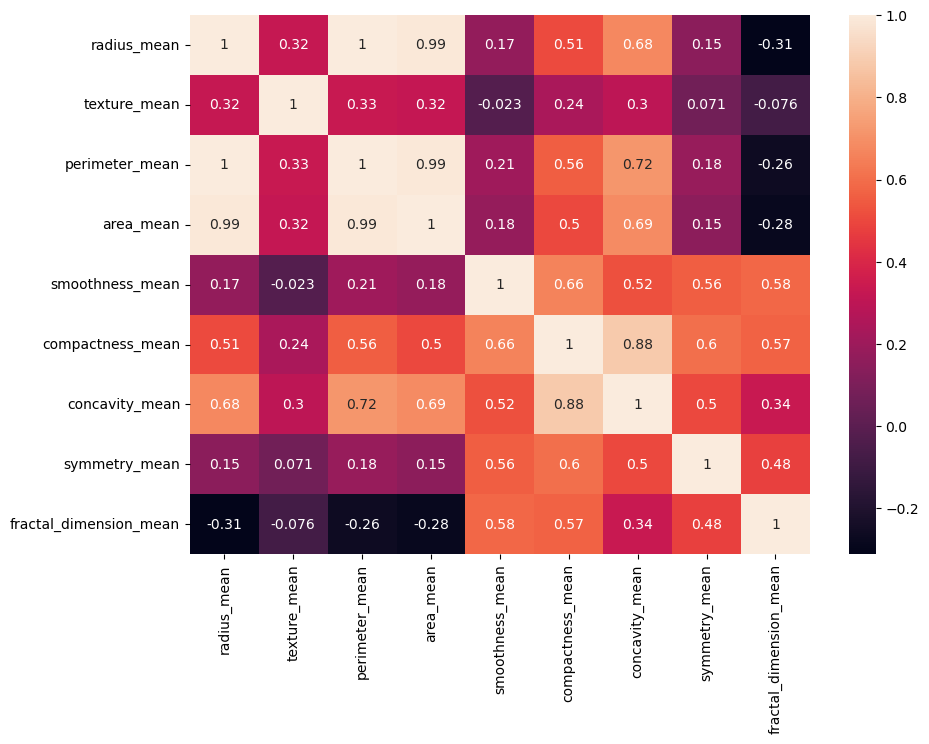

In [2]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
x = df[predictor_var]

#Compare the curves
sns.regplot(x= 'radius_mean', y= 'diagnosis', data= df, logistic= True,)
plt.show()
plt.close()
sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()
plt.close()

#1 Uncomment the heatmap and identify the two features that are highly correlated with radius_mean.
plt.figure(figsize = (10,7))
sns.heatmap(x.corr(), annot=True)
plt.show()

#2. Identify the other highly correlated pair. Define an array called correlated_pair containing the two features you've identified.

correlated_pair = ['compactness_mean', 'concavity_mean']

In [8]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score



#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

#1. Fit a Logsitic Regression model with the specified hyperparameters
log_reg = LogisticRegression(penalty='l2', fit_intercept=True) # penalty='none' 
print(log_reg.get_params())

#2. Fit the model to training data and obtain cofficient and intercept
log_reg.fit(x_train, y_train)
coefficients = log_reg.coef_
intercept = log_reg.intercept_


print('coefficeints: ', coefficients)
print('intercept: ', intercept)


#3. Calculate the accuracy, precision, recall, and f1-score on the testing data
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test set accuracy:\t{accuracy}')
print(f'Test set precision:\t{precision}')
print(f'Test set recall:\t{recall}')
print(f'Test set f1-score:\t{f1}')

#4. Remove the comments from the following code block to print the confusion matrix
test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred), 
     index=['actual no', 'actual yes'], 
     columns=['predicted no', 'predicted yes']
 )

print(test_conf_matrix)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
coefficeints:  [[0.96043261 0.20851817 1.92773791 1.02396046]]
intercept:  [-18.59940146]
Test set accuracy:	0.9064327485380117
Test set precision:	0.8852459016393442
Test set recall:	0.8571428571428571
Test set f1-score:	0.8709677419354839
            predicted no  predicted yes
actual no            101              7
actual yes             9             54


C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\1271230039.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

#1. Fit a Logsitic Regression model with the specified hyperparameters
log_reg = LogisticRegression(penalty='none', fit_intercept=True)
print(log_reg.get_params())

#2. Fit the model to training data and obtain cofficient and intercept
log_reg.fit(x_train, y_train)
coefficients = log_reg.coef_
intercept = log_reg.intercept_


print('coefficeints: ', coefficients)
print('intercept: ', intercept)


#3. Calculate the accuracy, precision, recall, and f1-score on the testing data
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test set accuracy:\t{accuracy}')
print(f'Test set precision:\t{precision}')
print(f'Test set recall:\t{recall}')
print(f'Test set f1-score:\t{f1}')

#4. Remove the comments from the following code block to print the confusion matrix
test_conf_matrix = pd.DataFrame(
     confusion_matrix(y_test, y_pred), 
     index=['actual no', 'actual yes'], 
     columns=['predicted no', 'predicted yes']
 )

print(test_conf_matrix)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\1733630370.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got 'none' instead.

In [12]:
import pandas as pd
import numpy as np

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)


log_reg = LogisticRegression(penalty='l2', fit_intercept=True,tol=0.0000001,solver='newton-cg')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)



#Using the predicted probabilities to get the predicted class
y_pred_class = (y_pred_prob[:,1]>0.5)*1.0
#1 Check if it's the same as y_pred
diff = np.array_equal(y_pred_class,y_pred)
print(diff)

## 2. Print the confusion matrix
print("Confusion Matrix: Threshold 50%")
cm_50 = confusion_matrix( y_test, y_pred_class)
print(cm_50)

##3 Confusion matrices for thresholds of 0.25 and 0.75
print("Confusion Matrix: Threshold 25%")
cm_25 = confusion_matrix(y_test, (y_pred_prob[:,1]>0.25)*1.0)
print(cm_25)

print("Confusion Matrix: Threshold 75%")
cm_75 = confusion_matrix(y_test, (y_pred_prob[:,1]>0.75)*1.0)
print(cm_75)

#4. Choosing the right threshold for a question

#Array of thresholds
thresh = np.linspace(0,1,100)
false_negatives = []

for t in thresh:
  cm = confusion_matrix(y_test, (y_pred_prob[:,1]>t)*1.0)
  false_negatives.append(cm[1][0])
thresh_choice = thresh[np.argmax(np.array(false_negatives)>=2)]
print(thresh_choice)

C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\4106741023.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


True
Confusion Matrix: Threshold 50%
[[101   7]
 [  9  54]]
Confusion Matrix: Threshold 25%
[[87 21]
 [ 1 62]]
Confusion Matrix: Threshold 75%
[[106   2]
 [ 17  46]]
0.27272727272727276


C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\482401030.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


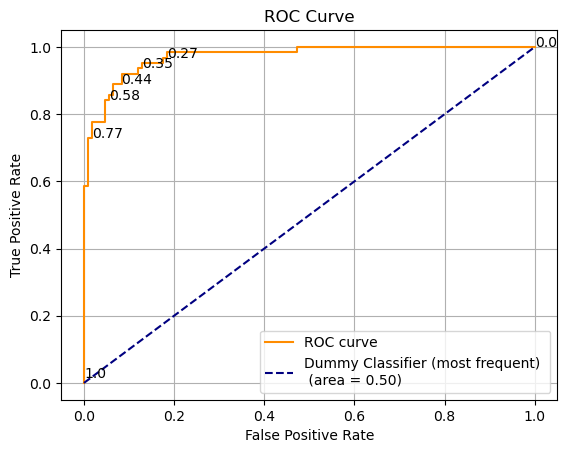

ROC AUC score: 0.9720752498530276


In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

log_reg = LogisticRegression(penalty='l2', fit_intercept=True,tol=0.0000001,solver='newton-cg')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)
###################################################################
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

#1. Run the code

#2. Find ROC_AUC score and print it
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean']
outcome_var='diagnosis'

x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=6, test_size=0.3)

print('Train positivity rate: ')
print(sum(y_train)/y_train.shape[0])
print('Test positivity rate: ')
print(sum(y_test)/y_test.shape[0])

log_reg = LogisticRegression(penalty='l2', max_iter=1000, fit_intercept=True, tol=0.000001)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Recall and Accuracy scores')
print(recall, accuracy)

## 1. Stratified Sampling
x_train_str, x_test_str, y_train_str, y_test_str = train_test_split(df[predictor_var], df[outcome_var], random_state=6, test_size=0.3, stratify=df[outcome_var])

### 2. Stratified positivity rates
print('Stratified train positivity rate: ')
str_train_positivity_rate = sum(y_train_str)/y_train_str.shape[0]
print(str_train_positivity_rate)

print('Stratified test positivity rate: ')
str_test_positivity_rate = sum(y_test_str)/y_test_str.shape[0]
print(str_test_positivity_rate)

### 3. Model predictions after Stratified sampling 
log_reg.fit(x_train_str, y_train_str)
y_pred = log_reg.predict(x_test_str)
recall_str = recall_score(y_test_str, y_pred)
accuracy_str = accuracy_score( y_test_str, y_pred)

print('Stratified Sampling: Recall and Accuracy scores')
print(recall_str, accuracy_str)


### 4. Balanced Class Weights
log_reg_bal = LogisticRegression(penalty='l2', max_iter=1000, fit_intercept=True, tol=0.000001, class_weight='balanced')

### 5. Model Predictions after balancing Class Weights
log_reg_bal.fit(x_train, y_train)
y_pred = log_reg_bal.predict(x_test)

recall_bal = recall_score(y_test, y_pred)
accuracy_bal = accuracy_score( y_test, y_pred)
print('Balanced Class Weights: Recall and Accuracy scores')
print(recall_bal)
print(accuracy_bal)


C:\Users\jeanpc\AppData\Local\Temp\ipykernel_10308\2062546378.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})


Train positivity rate: 
0.34673366834170855
Test positivity rate: 
0.4327485380116959
Recall and Accuracy scores
0.7972972972972973 0.8830409356725146
Stratified train positivity rate: 
0.37185929648241206
Stratified test positivity rate: 
0.3742690058479532
Stratified Sampling: Recall and Accuracy scores
0.875 0.9122807017543859
Balanced Class Weights: Recall and Accuracy scores
0.8783783783783784
0.8771929824561403
